In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('L18_sample.csv', index_col=0)
df

,A,B,C,D,E,F,G,y1,y2,y3
0,1,1,1,1,1,1,1,25.6,21.0,37.6
1,1,2,2,2,2,2,2,26.9,21.3,24.0
2,1,3,3,3,3,3,3,30.2,29.1,29.8
3,2,1,1,2,2,3,3,29.5,35.2,42.4
4,2,2,2,3,3,1,1,23.0,24.8,38.7
5,2,3,3,1,1,2,2,23.5,27.9,10.2
6,3,1,2,1,3,2,3,26.6,31.3,29.5
7,3,2,3,2,1,3,1,20.1,36.4,18.5
8,3,3,1,3,2,1,2,22.4,34.7,19.0
9,4,1,3,3,2,2,1,19.8,23.2,24.1


In [3]:
def analysis_doe(df, target:['y'], col, linear_regression=True, 
                 lasso_alpha=[0.01, 0.03, 0.1, 0,3, 1], print_results=True):
    from sklearn.linear_model import LinearRegression, Lasso
    from sklearn.preprocessing import StandardScaler
    
    df_start = df
    
    df_pairplot = df[target]
    sns.pairplot(df_pairplot)
    
    DF_y = []
    for y in target:
        DF_y.append(df[[y]])
    df = df.drop(columns=target)
    
    DF = []
    for c in df.columns:
        if c in col:
            dfc = pd.get_dummies(df[[c]], columns=[c])
        else:
            dfc = df[[c]]
        DF.append(dfc)
        
    df = pd.concat(DF, axis=1)
    
    scaler = StandardScaler()
    X = df.iloc[:, :].values
    X_s = scaler.fit_transform(X)
    
    N_ax = 1 + len(lasso_alpha)
    cmap = sns.color_palette('Dark2', N_ax)
    
    fig, axes = plt.subplots(len(DF_y), N_ax, figsize=(4*N_ax, 5*len(DF_y)))
    plt.subplots_adjust(hspace=0.4)
    
    for df_y, i in zip(DF_y, range(len(DF_y))):
        y = df_y.values
        L = [min(y), max(y)]
        n_ax = 0
        
        if print_results == True:
            print('-'*60)
            print('target = {}'.format(target[i]))

        # LinearRegression
        if linear_regression == True:

            lr = LinearRegression().fit(X, y)
            
            if print_results == True:
                print('='*40)
                print('Model: LinearRegression')
                print('Training Score: {:.3f}'.format(lr.score(X, y)))
                print('='*40)
                for c, coef in zip(df.columns, lr.coef_[0]):
                    print(c+': {:.4f}'.format(coef))
                print('i: {:.4f}'.format(lr.intercept_[0]))
                print('number of coef: ', len(df.columns))
                print('-'*40)

            if len(DF_y) == 1:
                axes[n_ax].set_title('Model: LinearRegression\nTraining Score: {:.3f}'.format(lr.score(X, y)))
                axes[n_ax].set_ylabel(target[i])
                axes[n_ax].scatter(lr.predict(X), y, color=cmap[n_ax])
                axes[n_ax].plot(L, L, color=cmap[n_ax])
                n_ax += 1
                
            else:
                axes[i,n_ax].set_title('Model: LinearRegression\nTraining Score: {:.3f}'.format(lr.score(X, y)))
                axes[i,n_ax].set_ylabel(target[i])
                axes[i,n_ax].scatter(lr.predict(X), y, color=cmap[n_ax])
                axes[i,n_ax].plot(L, L, color=cmap[n_ax])
                n_ax += 1

        # Lasso
        if lasso_alpha != False:

            for a in lasso_alpha:
                lasso = Lasso(alpha=a, max_iter=10**4).fit(X, y)
                
                if print_results == True:
                    print('='*40)
                    print('Model: Lasso(alpha={})'.format(a))
                    print('Training Score: {:.3f}'.format(lasso.score(X, y)))
                    print('='*40)
                    cnt = 0
                    for c, coef in zip(df.columns, lasso.coef_):
                        if abs(coef) > 0.00001:
                            print(c+': {:.4f}'.format(coef))
                            cnt += 1
                    print('i: {:.4f}'.format(lasso.intercept_[0]))
                    print('number of coef:', cnt)
                    print('-'*40)
                
                if len(DF_y) == 1:
                    axes[n_ax].set_title('Model: Lasso(alpha={})\nTraining Score: {:.3f}'.format(a, lasso.score(X, y)))
                    axes[n_ax].scatter(lasso.predict(X), y, color=cmap[n_ax])
                    axes[n_ax].plot(L, L, color=cmap[n_ax])
                    n_ax += 1
                    
                else:
                    axes[i,n_ax].set_title('Model: Lasso(alpha={})\nTraining Score: {:.3f}'.format(a, lasso.score(X, y)))
                    axes[i,n_ax].scatter(lasso.predict(X), y, color=cmap[n_ax])
                    axes[i,n_ax].plot(L, L, color=cmap[n_ax])
                    n_ax += 1
            
            if print_results == True:
                print('-'*60)

    df = pd.concat(DF+DF_y, axis=1)
    return df

------------------------------------------------------------
target = y1
Model: LinearRegression
Training Score: 0.992
A_1: 4.0278
A_2: 1.7944
A_3: -0.5056
A_4: -0.9056
A_5: -1.9722
A_6: -2.4389
B: -0.2917
C_1: 0.3944
C_2: 0.2611
C_3: -0.6556
D: 0.0417
E_1: -0.1722
E_2: -0.0889
E_3: 0.2611
F: 0.2500
G_1: -2.3222
G_2: -0.5722
G_3: 2.8944
i: 23.5389
number of coef:  18
----------------------------------------
Model: Lasso(alpha=0.01)
Training Score: 0.992
A_1: 4.8133
A_2: 2.5800
A_3: 0.2800
A_5: -1.0667
A_6: -1.5333
B: -0.2767
C_1: 0.1033
C_3: -0.8867
D: 0.0267
E_1: -0.0533
E_3: 0.3200
F: 0.2350
G_1: -1.7201
G_3: 3.4366
i: 22.3234
number of coef: 14
----------------------------------------
Model: Lasso(alpha=0.03)
Training Score: 0.987
A_1: 4.5733
A_2: 2.3400
A_3: 0.0400
A_5: -1.0667
A_6: -1.5333
B: -0.2467
C_1: 0.0433
C_3: -0.8267
E_3: 0.2567
F: 0.2050
G_1: -1.6601
G_3: 3.3766
i: 22.5000
number of coef: 12
----------------------------------------
Model: Lasso(alpha=0.1)
Training Score: 

,A_1,A_2,A_3,A_4,A_5,A_6,B,C_1,C_2,C_3,...,E_1,E_2,E_3,F,G_1,G_2,G_3,y1,y2,y3
0,1,0,0,0,0,0,1,1,0,0,...,1,0,0,1,1,0,0,25.6,21.0,37.6
1,1,0,0,0,0,0,2,0,1,0,...,0,1,0,2,0,1,0,26.9,21.3,24.0
2,1,0,0,0,0,0,3,0,0,1,...,0,0,1,3,0,0,1,30.2,29.1,29.8
3,0,1,0,0,0,0,1,1,0,0,...,0,1,0,3,0,0,1,29.5,35.2,42.4
4,0,1,0,0,0,0,2,0,1,0,...,0,0,1,1,1,0,0,23.0,24.8,38.7
5,0,1,0,0,0,0,3,0,0,1,...,1,0,0,2,0,1,0,23.5,27.9,10.2
6,0,0,1,0,0,0,1,0,1,0,...,0,0,1,2,0,0,1,26.6,31.3,29.5
7,0,0,1,0,0,0,2,0,0,1,...,1,0,0,3,1,0,0,20.1,36.4,18.5
8,0,0,1,0,0,0,3,1,0,0,...,0,1,0,1,0,1,0,22.4,34.7,19.0
9,0,0,0,1,0,0,1,0,0,1,...,0,1,0,2,1,0,0,19.8,23.2,24.1


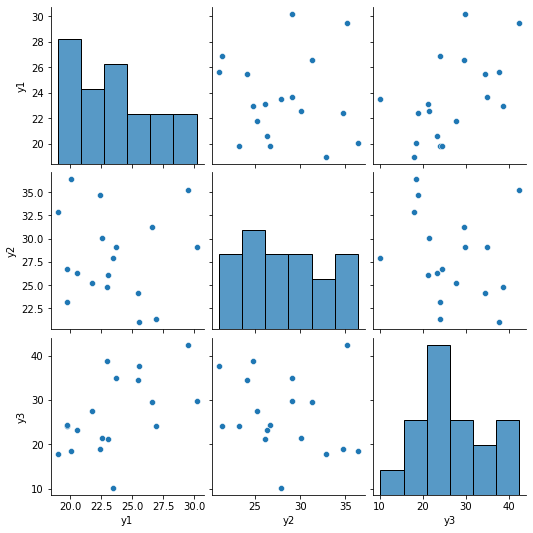

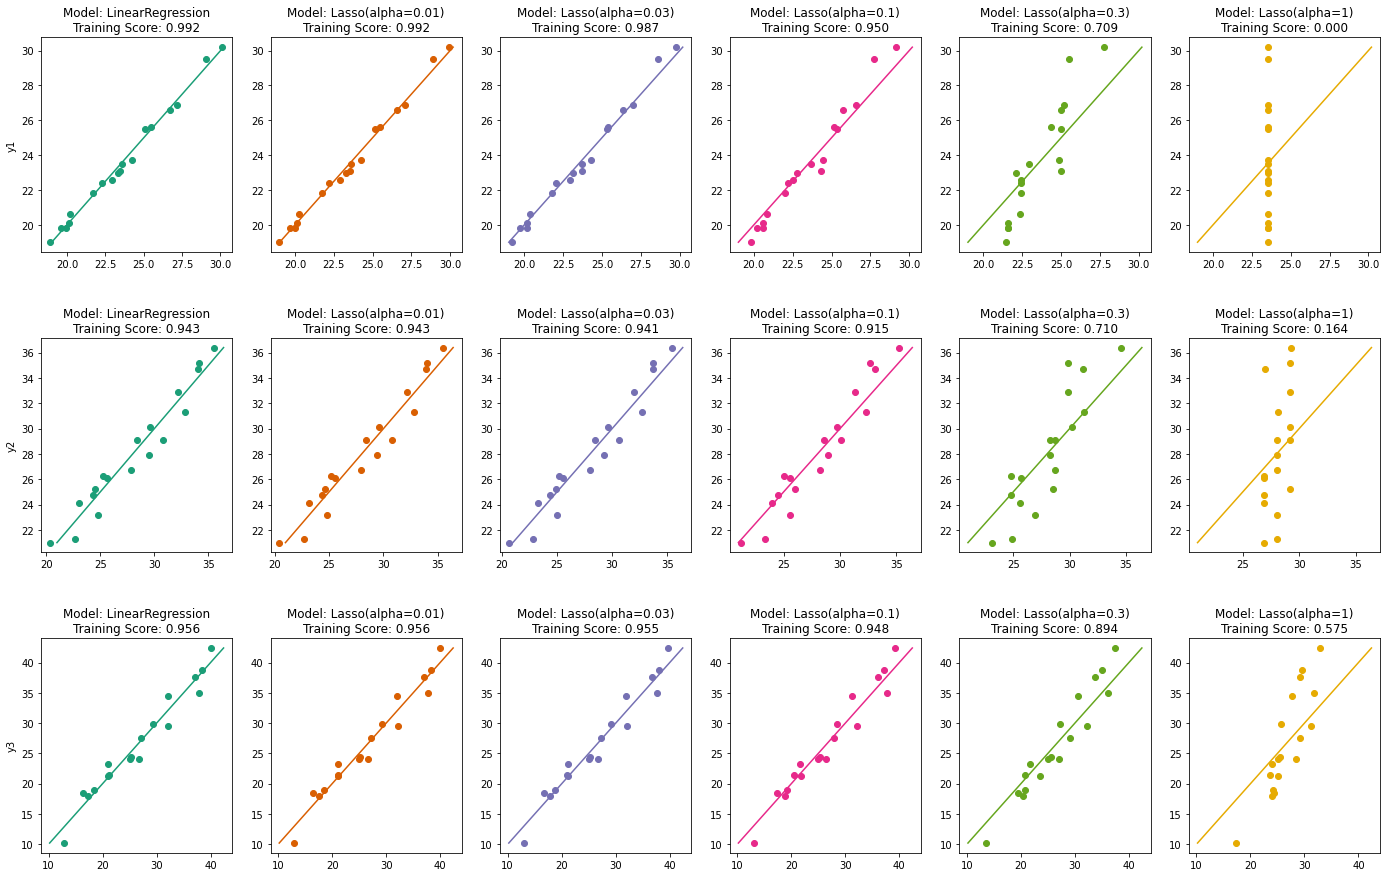

In [4]:
analysis_doe(df, 
             target=['y1', 'y2', 'y3'], 
             col=['A', 'C', 'E', 'G'], 
             lasso_alpha=[0.01, 0.03, 0.1, 0.3, 1],
             print_results=True)